In [39]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
#import GMM
from statsmodels.sandbox.regression.gmm import GMM, NonlinearIVGMM, LinearIVGMM
import statsmodels.api as sm
#set seaborn graphics
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [40]:
df_gdp = pd.read_pickle('gdpdata.pkl')
df_gdp.index = df_gdp['SurveyDate']
df_gdp = df_gdp.drop('SurveyDate', axis=1)

In [86]:
dfgdp1.loc[df_gdp.index>'2002-07-01']

,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term,CurrentYearDiff,OneYearDiff,LongTermDiff,TwoYearDiff,R1,R2
SurveyDate,,,,,,,,,,,,,
2002-07-22,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-22,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-22,84,1.3,2.80,2.7,NaN,NaN,2.5,-0.1,-0.2,0.2,NaN,NaN,NaN
2002-07-22,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-22,90,1.1,2.50,2.2,2.40,2.3,2.3,-0.2,-0.4,-0.2,NaN,-0.1,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-13,90,1.3,1.50,1.7,1.20,1.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,91,1.2,1.15,1.1,1.35,1.1,1.3,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
dfgdp1.loc[(dfgdp1.index>'2002-07-01')&(dfgdp1.index<'2002-10-01')]

,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term,CurrentYearDiff,OneYearDiff,LongTermDiff,TwoYearDiff,R1,R2
SurveyDate,,,,,,,,,,,,,
2002-07-22,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-22,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-22,84,1.3,2.8,2.7,NaN,NaN,2.5,-0.1,-0.2,0.2,NaN,NaN,NaN
2002-07-22,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-22,90,1.1,2.5,2.2,2.4,2.3,2.3,-0.2,-0.4,-0.2,NaN,-0.1,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-07-22,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-22,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-22,36,1.2,2.3,2.5,1.7,2.3,2.5,-0.4,-0.3,0.0,NaN,-0.5,-0.2


In [41]:
def bf_melt(df, col, dummy, listd):
    df[dummy] = 0
    dforig = df.copy()
    df['SD'] = df.index
    df = df.drop_duplicates(subset=['SD'], keep='first')
    df1 = df.copy()
    df1[listd] = 0
    df1['CurrentYearDiff'] = df1[col]
    df1[dummy] = 1
    df1 = df1.drop('SD', axis=1)
    dfnew = pd.concat([dforig, df1], axis=0)
    return dfnew.sort_index()

# load shocks

In [42]:
#EOP DEFINITION
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdf = mpdf.loc[(mpdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfwork = mpdf.loc[(mpdf.index>dates_list[i])&(mpdf.index<dates_list[i+1])].tail(1)
    #print(newdfwork)
    newdf = newdf.append(newdfwork)
newdf.index = dates_list
#repeat same for press conference
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpr = prdf.loc[(prdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    #newdfprwork = prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1)
    newdfpr = newdfpr.append(prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1))
newdfpr.index = dates_list

#repeat same for press release
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpc = pcdf.loc[(pcdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfpc = newdfpc.append(pcdf.loc[(pcdf.index>dates_list[i])&(pcdf.index<dates_list[i+1])].tail(1))
newdfpc.index = dates_list

#SUM DEFINITION
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfsum = mpdf.loc[(mpdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfworksum = mpdf.loc[(mpdf.index>dates_list[i])&(mpdf.index<dates_list[i+1])].sum()
    #print(newdfwork)
    newdfsum = newdfsum.append(newdfwork, ignore_index = True)
newdfsum.index = dates_list
#repeat same for press conference
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfprsum = prdf.loc[(prdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    #newdfprwork = prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1)
    newdfprsum = newdfprsum.append(prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].sum(), ignore_index = True)
newdfprsum.index = dates_list

#repeat same for press release
dates_list = df_gdp.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpcsum = pcdf.loc[(pcdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfpcsum = newdfpcsum.append(pcdf.loc[(pcdf.index>dates_list[i])&(pcdf.index<dates_list[i+1])].sum(),ignore_index = True)
newdfpcsum.index = dates_list

# transform data into means

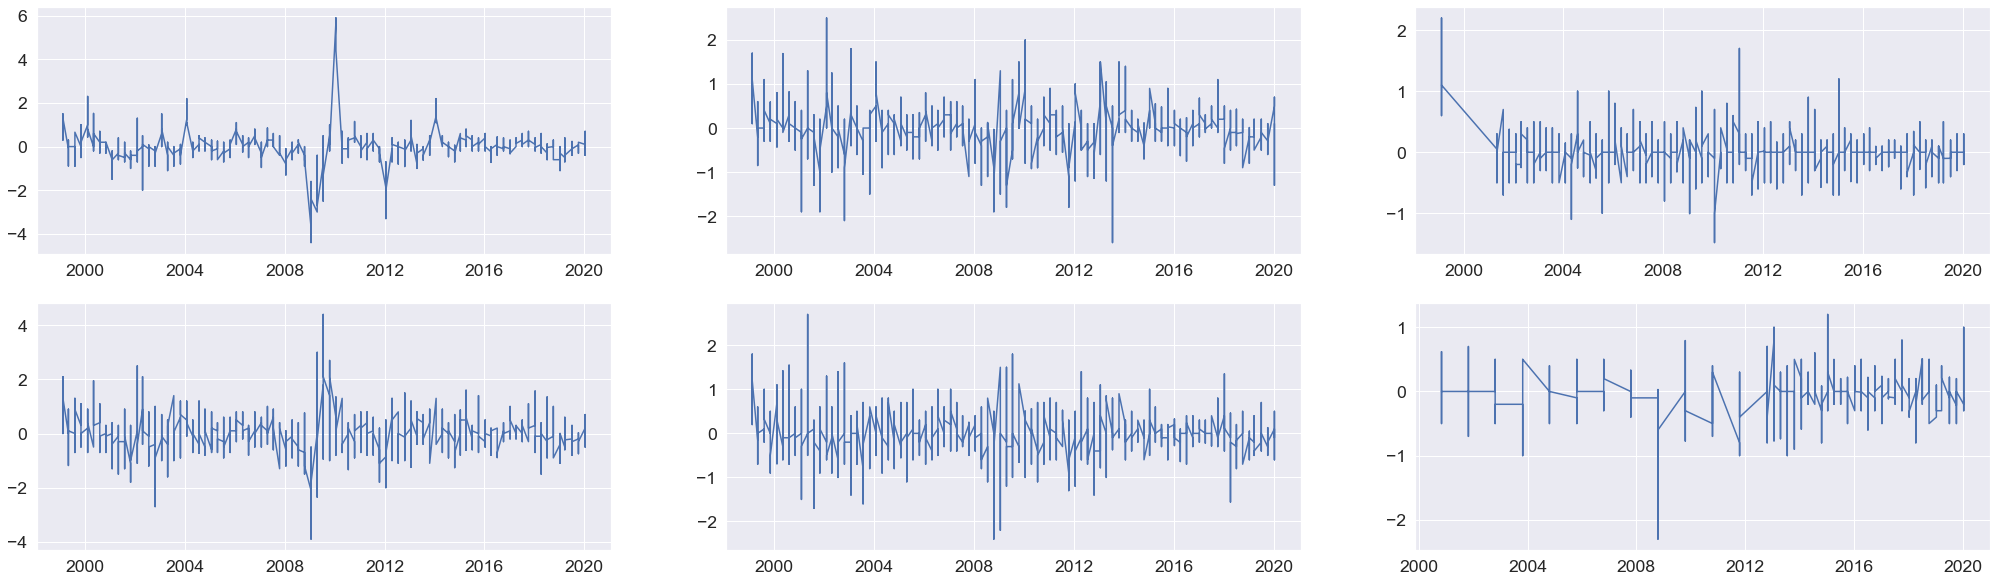

In [94]:
df_gdp['Current Year'] = df_gdp['Current Year'].astype(float)
df_gdp['One Year Ahead'] = df_gdp['One Year Ahead'].astype(float)
df_gdp['Two Years Ahead'] = df_gdp['Two Years Ahead'].astype(float)
df_gdp['Longer Term'] = df_gdp['Longer Term'].astype(float)
df_gdp['Rolling1'] = df_gdp['Rolling1'].astype(float)
df_gdp['Rolling2'] = df_gdp['Rolling2'].astype(float)
dfgdp1 = df_gdp.sort_values(by=['Source', 'SurveyDate'],ascending = [True, True])
dfgdp1['CurrentYearDiff'] = dfgdp1['Current Year'].diff()
dfgdp1['OneYearDiff'] = dfgdp1['One Year Ahead'].diff()
dfgdp1['LongTermDiff'] = dfgdp1['Longer Term'].diff()
dfgdp1['TwoYearDiff'] = dfgdp1['Two Years Ahead'].diff()
dfgdp1['R1'] = dfgdp1['Rolling1'].diff()
dfgdp1['R2'] = dfgdp1['Rolling2'].diff()
dfgdp1 = dfgdp1.sort_index()
#dfgdp1 = dfgdp1.dropna()
#dfgdp1.index = dfgdp1['SurveyDate']
fig, axs = plt.subplots(2, 3, figsize=(35, 10))
axs[0,0].plot(dfgdp1['CurrentYearDiff'].dropna().astype(float))
axs[0,1].plot(dfgdp1['OneYearDiff'].dropna().astype(float))
axs[0,2].plot(dfgdp1['LongTermDiff'].dropna().astype(float))
axs[1,0].plot(dfgdp1['R1'].dropna().astype(float))
axs[1,1].plot(dfgdp1['R2'].dropna().astype(float))
axs[1,2].plot(dfgdp1['TwoYearDiff'].dropna().astype(float))

In [92]:
df_gdp['Current Year'] = df_gdp['Current Year'].astype(float)
df_gdp['One Year Ahead'] = df_gdp['One Year Ahead'].astype(float)
df_gdp['Two Years Ahead'] = df_gdp['Two Years Ahead'].astype(float)
df_gdp['Longer Term'] = df_gdp['Longer Term'].astype(float)
df_gdp['Rolling1'] = df_gdp['Rolling1'].astype(float)
df_gdp['Rolling2'] = df_gdp['Rolling2'].astype(float)
dfgdp1 = df_gdp.sort_values(by=['Source', 'SurveyDate'],ascending = [True, True])
dfgdp1.diff()

,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term
SurveyDate,,,,,,,
1999-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-05-03,0.0,0.0,0.0,NaN,0.1,0.0,NaN
1999-08-06,0.0,0.0,0.0,NaN,0.0,0.0,NaN
1999-11-03,0.0,-0.1,0.3,NaN,0.5,0.0,NaN
2000-02-09,0.0,1.1,0.2,NaN,0.2,0.5,NaN
...,...,...,...,...,...,...,...
2019-01-11,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,0.0,-0.3,0.0,0.0,0.0,0.0,0.0
2019-07-05,0.0,-0.1,-0.2,0.0,-0.2,-0.2,0.0


In [45]:
dfgdp1

,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term,CurrentYearDiff,OneYearDiff,LongTermDiff,TwoYearDiff,R1,R2
SurveyDate,,,,,,,,,,,,,
1999-02-12,1,2.0,2.50,NaN,2.20,2.5,2.3,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-12,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-12,11,2.1,2.40,NaN,2.00,2.5,2.5,1.3,1.1,1.1,NaN,1.2,1.1
1999-02-12,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-12,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-13,90,1.3,1.50,1.7,1.20,1.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,91,1.2,1.15,1.1,1.35,1.1,1.3,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


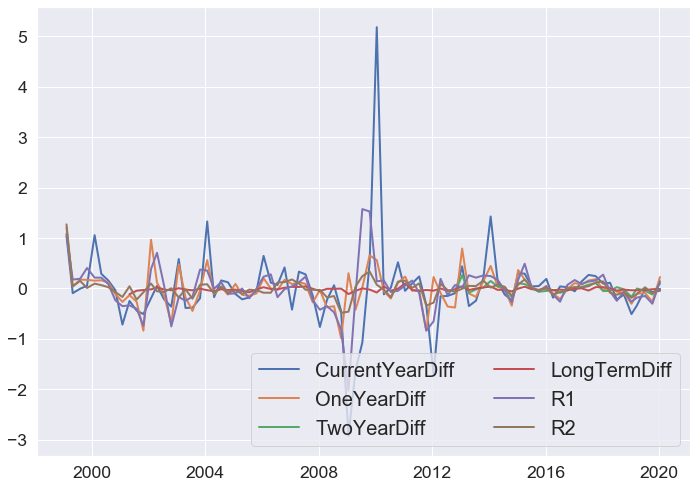

In [46]:
df1gdpmeans = dfgdp1.groupby('SurveyDate')[['CurrentYearDiff','OneYearDiff','TwoYearDiff', 'LongTermDiff', 'R1', 'R2']].mean()
#df1gdpmeans.index = dfgdp1.index.unique()
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.6)
plt.plot(df1gdpmeans, linewidth=2.0)
plt.legend(list(df1gdpmeans), ncol=2, loc='lower right', fontsize=20)

In [99]:
#order data
dataols = pd.concat([df1gdpmeans, newdfpc], axis=1)
dataols = pd.concat([dataols, ecb_diff], axis=1)
var = 'OIS_2Y'
dataols = dataols.dropna(subset = [var]).iloc[:-1,:]
#time periods
#dataols = dataols.loc[(dataols.index>'2002-01-01')&(dataols.index<'2014-01-01')]
dataols = dataols.loc[dataols.index>'2003-01-01']
#create dummies
dataols['D1'] = (dataols.index.month.isin([1,2])==True)*1*dataols[var]
dataols['D2'] = (dataols.index.month.isin([3,4])==True)*1*dataols[var]
dataols['D3'] = (dataols.index.month.isin([7,8])==True)*1*dataols[var]
dataols['D4'] = (dataols.index.month.isin([10,11])==True)*1*dataols[var]
dataols['DTY'] = (dataols['TwoYearDiff'].isnull()==False)*1
dataols['TwoYearDiff'] = dataols['TwoYearDiff'].fillna(value=0)
exog = dataols[['D1', 'D2', 'D3', 'D4',  var]]
#exog = dataols[[var]]
endog = dataols[['CurrentYearDiff', 'OneYearDiff', 'TwoYearDiff','R1', 'R2']].copy()

In [100]:
dataols

,CurrentYearDiff,OneYearDiff,TwoYearDiff,LongTermDiff,R1,R2,date,OIS_SW,OIS_1M,OIS_3M,...,EURJPY,Unnamed: 0,CurrY,1Y,2Y,D1,D2,D3,D4,DTY
SurveyDate,,,,,,,,,,,,,,,,,,,,,
2003-01-27,0.584327,0.479997,0.000000,0.005952,-0.169180,-0.176826,2003-01-09,0.50,0.900000,1.450000,...,0.017977,2003-03-01,0.2,0.4,NaN,1.95,0.00,0.000000,0.000000,0
2003-04-24,-0.386087,-0.177727,0.000000,-0.019737,-0.243333,-0.016923,2003-04-03,-0.50,0.500000,0.450000,...,0.058611,2003-06-01,-0.3,-0.4,NaN,-0.00,-0.20,-0.000000,-0.000000,0
2003-07-23,-0.380682,-0.445349,0.000000,-0.035937,-0.162308,-0.201515,2003-07-10,0.25,0.250000,0.750000,...,0.003745,2003-09-01,-0.3,-0.1,NaN,0.00,0.00,0.250000,0.000000,0
2003-10-28,-0.194615,-0.040390,-0.020460,-0.003906,0.375128,0.074284,2003-10-02,0.00,0.050000,0.800000,...,-0.146554,2003-12-01,0.0,0.1,NaN,0.00,0.00,0.000000,4.250000,1
2004-01-28,1.328846,0.561000,0.000000,-0.033235,0.355814,0.083784,2004-01-08,0.00,0.300000,-0.500000,...,0.694254,2004-03-01,1.1,0.8,NaN,-2.05,-0.00,-0.000000,-0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-05,-0.120996,-0.088358,-0.016205,-0.022445,-0.063365,-0.077524,2018-09-13,0.00,0.000000,0.000000,...,0.657311,2018-12-01,-0.1,-0.1,0.0,-0.00,-0.00,-0.000000,-0.270000,1
2019-01-11,-0.507908,-0.303541,-0.165986,-0.035633,-0.263530,-0.184660,2018-12-13,0.00,0.000000,0.000000,...,-0.217190,2019-03-01,-0.8,-0.1,-0.2,-0.68,-0.00,-0.000000,-0.000000,1
2019-03-22,-0.335121,-0.103136,-0.000370,-0.035880,-0.181013,-0.105179,2019-03-07,0.00,-0.360000,-0.490000,...,-0.425720,2019-06-01,0.1,-0.2,-0.1,-0.00,-0.48,-0.000000,-0.000000,1


In [123]:
'''
'''
class mpGMM(GMM):
    
    def __init__(self, *args, **kwds):
        # set appropriate counts for moment conditions and parameters
        # TODO: clean up signature
        kwds.setdefault('k_moms', 14)
        kwds.setdefault('k_params', 12)
        super(mpGMM, self).__init__(*args, **kwds)


    def momcond(self, params):
        c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11 = params
        endog = self.endog
        exog = self.exog
        #defining variables
        #interaction dummies
        dQ1 = exog[:,0]
        dQ2 = exog[:,1]
        dQ3 = exog[:,2]
        dQ4 = exog[:,3]
        dTY = exog[:,4]
        #endogenous variables
        currentY = endog[:,0]
        nextY = endog[:,1]
        twoY = endog[:,2]
        rolling1 = endog[:,3]
        rolling2 = endog[:,4]
        #monetary policy shock
        mp = exog[:,5]
        #next year forecasts
        error11 = dQ1*(nextY-mp*(1/4*c1+1/2*c2+3/4*c3+1*c4+3/4*c5+1/2*c6+1/4*c7))
        error1 = dQ2*(nextY-mp*(1/4*c0+1/2*c1+3/4*c2+1*c3+3/4*c4+1/2*c5+1/4*c6))
        error2 = dQ3*(nextY-mp*(1/2*c0+3/4*c1+1*c2+3/4*c3+1/2*c4+1/4*c5))
        error3 = dQ4*(nextY-mp*(3/4*c0+1*c1+3/4*c2+1/2*c3+1/4*c4))
        #current year forecasts
        error12 = dQ1*(currentY-mp*(c0+3/4*c1+1/2*c2+1/4*c3))
        error4 = dQ2*(currentY-mp*(3/4*c0+1/2*c1+1/4*c2))
        error5 = dQ3*(currentY-mp*(1/2*c0+1/4*c1))
        error6 = dQ4*(currentY-mp*(1/4*c0))
        #rolling forecasts
        error7 = dQ1*dTY*mp*(twoY-mp*(1/4*c5+1/2*c6+3/4*c7+c8+3/4*c9+1/2*c10+1/4*c11))
        error8 = dQ2*dTY*mp*(twoY-mp*(1/4*c4+1/2*c5+3/4*c6+c7+3/4*c8+1/2*c9+1/4*c10))
        error9 = dQ3*dTY*mp*(twoY-mp*(1/4*c3+1/2*c4+3/4*c5+c6+3/4*c7+1/2*c8+1/4*c9))
        error10 = dQ4*dTY*mp*(twoY-mp*(1/4*c2+1/2*c3+3/4*c4+c5+3/4*c6+1/2*c7+1/4*c8))
        #r
        error13 = mp*(rolling1-mp*(c3))
        error14 = mp*(rolling2-mp*(c7))
        g = np.column_stack((error1, error2, error3, error4, error5, error6, error7, error8, error9, error10,
                            error11, error12, error13, error14))
        return g

#order data
dataols = pd.concat([df1gdpmeans, newdfpc], axis=1)
dataols = pd.concat([dataols, ecb_diff], axis=1)
var = 'OIS_2Y'
dataols = dataols.dropna(subset = [var]).iloc[:-1,:]
#time periods
#dataols = dataols.loc[(dataols.index>'2002-01-01')&(dataols.index<'2014-01-01')]
dataols = dataols.loc[dataols.index>'2002-01-01']
#create dummies
dataols['D1'] = (dataols.index.month.isin([1,2])==True)*1*dataols[var]
dataols['D2'] = (dataols.index.month.isin([3,4])==True)*1*dataols[var]
dataols['D3'] = (dataols.index.month.isin([7,8])==True)*1*dataols[var]
dataols['D4'] = (dataols.index.month.isin([10,11])==True)*1*dataols[var]
dataols['DTY'] = (dataols['TwoYearDiff'].isnull()==False)*1
dataols['TwoYearDiff'] = dataols['TwoYearDiff'].fillna(value=0)
exog = dataols[['D1', 'D2', 'D3', 'D4', 'DTY', var]]
#exog = dataols[[var]]
endog = dataols[['CurrentYearDiff', 'OneYearDiff', 'TwoYearDiff', 'R1', 'R2']].copy()
#instr = np.asarray(exogt.iloc[:, 4:])
model = mpGMM(endog, exog,  None)
beta0 = np.zeros((1, 12))
res = model.fititer(beta0, maxiter=100, optim_method='bfgs',  weights_method='cov',
                    wargs={'centered':True})
w0 = res[1]
inv_weights = np.linalg.inv(w0)
res = model.fit(beta0, maxiter=2,  inv_weights =inv_weights, optim_method='bfgs', weights_method='cov',
                wargs={'centered':True})
print(res.summary(yname='GDP forecast diff', xname=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7',
                                                   'c8', 'c9', 'c10', 'c11']))

Optimization terminated successfully.
         Current function value: 0.000347
         Iterations: 34
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.001832
         Iterations: 26
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.001743
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.001711
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.001706
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.001706
         Iterations: 15
         Function evaluations: 22
  

In [117]:
'''
'''
class mpGMM(GMM):
    
    def __init__(self, *args, **kwds):
        # set appropriate counts for moment conditions and parameters
        # TODO: clean up signature
        kwds.setdefault('k_moms', 10)
        kwds.setdefault('k_params', 8)
        super(mpGMM, self).__init__(*args, **kwds)


    def momcond(self, params):
        c0, c1, c2, c3, c4, c5, c6, c7 = params
        endog = self.endog
        exog = self.exog
        #defining variables
        #interaction dummies
        dQ1 = exog[:,0]
        dQ2 = exog[:,1]
        dQ3 = exog[:,2]
        dQ4 = exog[:,3]
        dTY = exog[:,4]
        #endogenous variables
        currentY = endog[:,0]
        nextY = endog[:,1]
        twoY = endog[:,2]
        rolling1 = endog[:,3]
        rolling2 = endog[:,4]
        #monetary policy shock
        mp = exog[:,5]
        #next year forecasts
        error11 = dQ1*(nextY-mp*(1/4*c1+1/2*c2+3/4*c3+1*c4+3/4*c5+1/2*c6+1/4*c7))
        error1 = dQ2*(nextY-mp*(1/4*c0+1/2*c1+3/4*c2+1*c3+3/4*c4+1/2*c5+1/4*c6))
        error2 = dQ3*(nextY-mp*(1/2*c0+3/4*c1+1*c2+3/4*c3+1/2*c4+1/4*c5))
        error3 = dQ4*(nextY-mp*(3/4*c0+1*c1+3/4*c2+1/2*c3+1/4*c4))
        #current year forecasts
        error12 = dQ1*(currentY-mp*(c0+3/4*c1+1/2*c2+1/4*c3))
        error4 = dQ2*(currentY-mp*(3/4*c0+1/2*c1+1/4*c2))
        error5 = dQ3*(currentY-mp*(1/2*c0+1/4*c1))
        error6 = dQ4*(currentY-mp*(1/4*c0))
        #rolling forecasts
        #r
        error13 = mp*(rolling1-mp*(c3))
        error14 = mp*(rolling2-mp*(c7))
        g = np.column_stack((error1, error2, error3, error4, error5, error6, 
                            error11, error12, error13, error14))
        return g

#order data
dataols = pd.concat([df1gdpmeans, newdfpc], axis=1)
dataols = pd.concat([dataols, ecb_diff], axis=1)
var = 'OIS_2Y'
dataols = dataols.dropna(subset = [var]).iloc[:-1,:]
#time periods
#dataols = dataols.loc[(dataols.index>'2002-01-01')&(dataols.index<'2014-01-01')]
dataols = dataols.loc[dataols.index>'2002-01-01']
#create dummies
dataols['D1'] = (dataols.index.month.isin([1,2])==True)*1*dataols[var]
dataols['D2'] = (dataols.index.month.isin([3,4])==True)*1*dataols[var]
dataols['D3'] = (dataols.index.month.isin([7,8])==True)*1*dataols[var]
dataols['D4'] = (dataols.index.month.isin([10,11])==True)*1*dataols[var]
dataols['DTY'] = (dataols['TwoYearDiff'].isnull()==False)*1
dataols['TwoYearDiff'] = dataols['TwoYearDiff'].fillna(value=0)
exog = dataols[['D1', 'D2', 'D3', 'D4', 'DTY', var]]
#exog = dataols[[var]]
endog = dataols[['CurrentYearDiff', 'OneYearDiff', 'TwoYearDiff', 'R1', 'R2']].copy()
#instr = np.asarray(exogt.iloc[:, 4:])
model = mpGMM(endog, exog,  None)
beta0 = np.zeros((1, 8))
res = model.fititer(beta0, maxiter=1000, optim_method='bfgs',  weights_method='cov',
                    wargs={'centered':False})
w0 = res[1]
inv_weights = np.linalg.inv(w0)
res = model.fit(beta0, maxiter=2,  inv_weights =inv_weights, optim_method='bfgs', weights_method='cov',
                wargs={'centered':False})
print(res.summary(yname='GDP forecast diff', xname=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']))

Optimization terminated successfully.
         Current function value: 0.000347
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.001832
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.001743
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.001711
         Iterations: 17
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.001707
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.001706
         Iterations: 12
         Function evaluations: 16
  

In [30]:
'''
'''
class mpGMM(GMM):
    
    def __init__(self, *args, **kwds):
        # set appropriate counts for moment conditions and parameters
        # TODO: clean up signature
        kwds.setdefault('k_moms', 6)
        kwds.setdefault('k_params', 6)
        super(mpGMM, self).__init__(*args, **kwds)


    def momcond(self, params):
        c0, c1, c2, c3, c4, c5 = params
        endog = self.endog
        exog = self.exog
        #defining variables
        #interaction dummies
        dQ2 = exog[:,1]
        dQ3 = exog[:,2]
        dQ4 = exog[:,3]
        #endogenous variables
        currentY = endog[:,0]
        nextY = endog[:,1]
        rolling1 = endog[:,2]
        rolling2 = endog[:,3]
        ecb1 = endog[:,4]
        ecb2 = endog[:,5]
        #monetary policy shock
        mp = exog[:,4]
        #next year forecasts
        error1 = dQ2*(nextY-mp*(1/4*c0+1/2*c1+3/4*c2+1*c3+3/4*c4+1/2*c5))
        error2 = dQ3*(nextY-mp*(1/2*c0+3/4*c1+1*c2+3/4*c3+1/2*c4+1/4*c5))
        error3 = dQ4*(nextY-mp*(3/4*c0+1*c1+3/4*c2+1/2*c3+1/4*c4))
        #current year forecasts
        error4 = dQ2*(currentY-mp*(3/4*c0+1/2*c1+1/4*c2))
        error5 = dQ3*(currentY-mp*(1/2*c0+1/4*c1))
        error6 = dQ4*(currentY-mp*(1/4*c0))
        #ecb
        #next year forecasts
        error9 = dQ2*(ecb2-mp*(1/4*c0+1/2*c1+3/4*c2+1*c3+3/4*c4+1/2*c5))
        error10 = dQ3*(ecb2-mp*(1/2*c0+3/4*c1+1*c2+3/4*c3+1/2*c4+1/4*c5))
        error11 = dQ4*(ecb2-mp*(3/4*c0+1*c1+3/4*c2+1/2*c3+1/4*c4))
        #current year forecasts
        error12 = dQ2*(ecb1-mp*(3/4*c0+1/2*c1+1/4*c2))
        error13 = dQ3*(ecb1-mp*(1/2*c0+1/4*c1))
        error14 = dQ4*(ecb1-mp*(1/4*c0))
        #rolling forecasts
        error8 = mp*(rolling1-mp*(1*c0+3/4*c1+1/2*c2))
        error7 = mp*(rolling2-mp*(0*c0+1/4*c1+1/2*c2+3/4*c3+1*c4+3/4*c5))
        g = np.column_stack((error9,error10, error11, error12, error13, error14))
        return g

#order data
dataols = pd.concat([df1gdpmeans, newdfpc], axis=1)
dataols = pd.concat([dataols, ecb_diff], axis=1)
var = 'OIS_2Y'
dataols = dataols.dropna(subset = [var, 'CurrentYearDiff', 'OneYearDiff', 'R1', 'R2', 'CurrY', '1Y'])
#time periods
#dataols = dataols.loc[(dataols.index>'2002-01-01')&(dataols.index<'2014-01-01')]
dataols = dataols.loc[dataols.index>'2003-01-01']
#create dummies
dataols['D1'] = (dataols.index.month.isin([1,2])==True)*1*dataols[var]
dataols['D2'] = (dataols.index.month.isin([3,4])==True)*1*dataols[var]
dataols['D3'] = (dataols.index.month.isin([7,8])==True)*1*dataols[var]
dataols['D4'] = (dataols.index.month.isin([10,11])==True)*1*dataols[var]
exog = dataols[['D1', 'D2', 'D3', 'D4',  var]]
#exog = dataols[[var]]
endog = dataols[['CurrentYearDiff', 'OneYearDiff', 'R1', 'R2', 'CurrY', '1Y']].copy()
#instr = np.asarray(exogt.iloc[:, 4:])
model = mpGMM(endog, exog,  None)
beta0 = np.zeros((1, 6))
res = model.fititer(beta0, maxiter=1000, optim_method='bfgs',  weights_method='cov',
                    wargs={'centered':False})
w0 = res[1]
inv_weights = np.linalg.inv(w0)
res = model.fit(beta0, maxiter=2,  inv_weights =inv_weights, optim_method='bfgs', weights_method='cov',
                wargs={'centered':False})
print(res.summary(yname='GDP forecast diff', xname=['c0', 'c1', 'c2', 'c3', 'c4', 'c5']))

Optimization terminated successfully.
         Current function value: 0.003301
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.016727
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.012269
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.010328
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.009737
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.009573
         Iterations: 7
         Function evaluations: 11
      

In [11]:
ecb_diff = pd.read_csv('ecb_diff.csv')
newindex = df1gdpmeans.index[:-1]
newindex = newindex[len(newindex)-len(ecb_diff):]
ecb_diff.index = newindex

In [14]:
ecb_diff

,Unnamed: 0,CurrY,1Y,2Y
SurveyDate,,,,
2001-02-01,2001-03-01,NaN,NaN,NaN
2001-05-03,2001-06-01,-0.4,-0.2,NaN
2001-08-03,2001-09-01,-0.9,-0.6,NaN
2001-10-29,2001-12-01,-0.1,-0.8,NaN
2002-02-04,2002-03-01,-0.5,1.3,NaN
...,...,...,...,...
2018-10-05,2018-12-01,-0.1,-0.1,0.0
2019-01-11,2019-03-01,-0.8,-0.1,-0.2
2019-03-22,2019-06-01,0.1,-0.2,-0.1
